In [0]:
!pip install tensorflow

In [0]:
import tensorflow as tf
print(tf.__version__)

In [0]:
import os, cv2, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
from google.colab import drive
drive.mount('/content/drive')

In [0]:


TRAIN_DIR = '/content/drive/My Drive/plate_number/'

TEST_DIR = '/content/drive/My Drive/negative_images/'


ROWS = 64

COLS = 64

CHANNELS = 3

In [0]:
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)] 

test_images  = [TEST_DIR+i for i in os.listdir(TEST_DIR)]


In [0]:
def read_image(file_path):
  img = cv2.imread(file_path, cv2.IMREAD_COLOR)
  resized_img = cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_AREA)
  return resized_img


In [0]:
def prep_data(images):
  m = len(images)
  n_x = ROWS*COLS*CHANNELS
  X = np.ndarray((n_x,m), dtype = np.uint8)
  y = np.zeros((1,m))
  print("X has a shape of {}".format(X.shape))
  for i, image_file in enumerate(images):
    
    image = read_image(image_file)
    X[:,i] = np.squeeze(image.reshape((n_x,1)))
    
    if '-' in image_file.lower():
      y[0,i] = 1
      
    else:
      y[0,i] = 0
      
  return X,y
  

In [30]:
X_img, y_img = prep_data(train_images + test_images)

X has a shape of (12288, 100)


In [0]:
classes = {0: 'negative',
          1: 'plate number'}

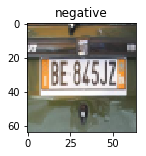

In [37]:
def show_images(X, y, idx) :
  image = X[idx]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize=(4,2))
  plt.imshow(image),
  plt.title(classes[y[idx,0]])
  plt.show()
  
show_images(X_img.T, y_img.T, np.random.randint(0,100))  

In [45]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV()
X_img_lr, y_img_lr = X_img.T, y_img.T.ravel()

clf.fit(X_img_lr, y_img_lr)
print("Model accuracy: {:.2f}%".format(clf.score(X_img_lr, y_img_lr)*100))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Model accuracy: 100.00%


In [0]:
def show_image_prediction(X, idx, model) :
  image = X[idx].reshape(1,-1)
  image_class = classes[model.predict(image).item()]
  image = image.reshape((ROWS, COLS, CHANNELS))
  plt.figure(figsize = (4,2))
  plt.imshow(image)
  plt.title("TEST {} : {}".format(idx, image_class))
  
  plt.show()

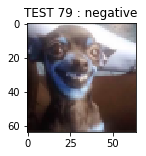

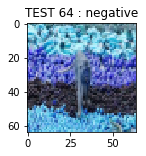

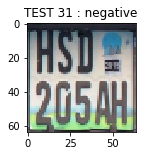

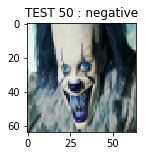

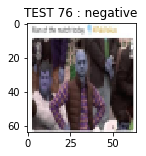

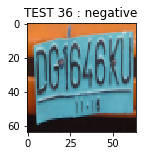

In [47]:
X_img_lr, y_img_lr = X_img.T, y_img.T

for i in np.random.randint(0, len(X_img_lr), 6) :
    show_image_prediction(X_img_lr, i, clf)

In [48]:
from sklearn.neighbors import RadiusNeighborsClassifier

rnc = RadiusNeighborsClassifier()
rnc.fit(X_img_lr, y_img_lr)

print("Model accuracy: {:.2f}%".format(rnc.score(X_img_lr, y_img_lr)*100))

Model accuracy: 100.00%


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


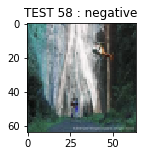

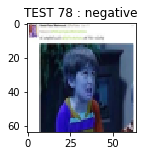

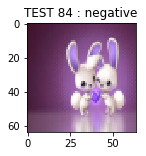

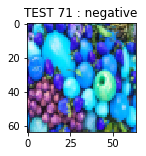

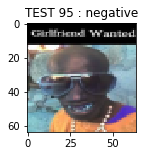

In [49]:
X_img_lr, y_img_lr = X_img.T, y_img.T

for i in np.random.randint(0, len(X_img_lr), 5) :
    show_image_prediction(X_img_lr, i, rnc)